In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [7]:
# copy demo into current directory
ac.copydemo('pcl')

# start AUTO with runner object
runner = ra.runAUTO()

print("\n1st run - continue equilibrium 0 and branches of secondary equilibria")
r1 = ac.run(e='pcl',ICP=['rho'],NDIM=3,ILP=0,ITNW=7,
         STOP=['HB1'],UZSTOP={1:31.6},DS=0.1,DSMAX=2.0,
         unames={1:'xgamma',2:'ygamma',3:'zgamma',4:'x',5:'y',6:'z',
                 7:'x+',8:'y+',9:'z+',10:'x-',11:'y-',12:'z-'},
         parnames={1:'rho',2:'beta',3:'sigma',
                   11:'T',12:'mu',13:'h',14:'T+',15:'delta',16:'T-',17:'eps',
                   21:'sigma+',22:'sigma-',23:'eta',25:'Zx',26:'Zy'},
         runner=runner)

print("\n2nd run - switch to the periodic orbit and continue in rho up to 24.0579")
r2 = ac.run(r1('HB2'),ICP=['rho','T'],IPS=2,NTST=50,
         STOP=[],UZSTOP={'rho':24.0579},runner=runner)

print("\n3rd run - extend the system")
r3 = ac.run(r2('UZ1'),ICP=['mu','h','T'],IPS=4,NDIM=6,NBC=7,NINT=1,
         STOP=['BP1'],UZSTOP={},DS=-0.1,DSMIN=1e-7,DSMAX=1.0,runner=runner)

print("\n4th run - normalize the Floquet bundle")
r4 = ac.run(r3('BP1'),ISW=-1,
         STOP=[],UZSTOP={'h':1.0},DS=1,DSMIN=1e-5,DSMAX=100,runner=runner)

print("\n5th run - integrate backwards from the periodic orbit")
print("measures the distance to Sigma = { x=10 } in sigma+")
print("UZ point corresponds to an intersection with Sigma")
r5 = ac.run(r4('UZ1'),ICP=['T+','mu','T','sigma+'],ISW=1,NDIM=9,NBC=11,
         STOP=['UZ1'],UZR={'sigma+':0},UZSTOP={},DS=1.0,runner=runner)

print("\n6th run - integrate away from the equilibrium up to Sigma")
print("(second UZ is the one we want)")
r6 = ac.run(r5('UZ1'),ICP=['T-','sigma-','T+','mu','T'],NDIM=12,NBC=15,
         STOP=['UZ2'],UZR={'sigma-':0},runner=runner)

print("\n7th run - put starting data for Lin vector and Lin gap in")
print("Zx, Zy, Zz and eta")
print("close the gap (with some intermediate solutions)")
r7 = ac.run(r6('UZ2'),ICP=['eta','rho','delta','eps','T-','T+','mu','T'],
         NBC=17,NINT=2,NPR=10,THL={'T':0,'T+':0,'T-':0},
         STOP=['UZ1'],UZR={'eta':0},DS=-0.01,DSMIN=1e-7,DSMAX=0.1,runner=runner)
ac.save(r7,'closegap')

print("\n8th run - keep the gap closed and continue in rho,beta")
start8 = ac.load(r7('UZ1'),ICP=['rho','beta','delta','eps','T-','T+','mu','T'],
     STOP=['LP1'],UZR={'rho':25},UZSTOP={'rho':80},ILP=1,NPR=200,DS=0.1,DSMAX=1,runner=runner)
r8 = ac.merge( ac.run(start8,runner=runner) +ac. run(start8,DS='-',runner=runner) )
ac.save(r8,'cont')

Copying demo pcl ... done

1st run - continue equilibrium 0 and branches of secondary equilibria
gfortran -fopenmp -O -c pcl.f90 -o pcl.o
gfortran -fopenmp -O pcl.o -o pcl.exe /auto/lib/*.o
Starting pcl ...

  BR    PT  TY  LAB      rho         L2-NORM        xgamma        ygamma        zgamma    
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1     5  BP    2   1.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    22  UZ    3   3.16000E+01   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00

  BR    PT  TY  LAB      rho         L2-NORM        xgamma        ygamma        zgamma    
   2    44  HB    4   2.47368E+01   2.62685E+01   7.95602E+00   7.95602E+00   2.37368E+01

  BR    PT  TY  LAB      rho         L2-NORM        xgamma        ygamma        zgamma    
   2    44  HB    5   2.47368E+01   2.62685E+01  -7.95602E+00  -7.95602E+00   2.37368E+01

 Total Time    0.147E+00
pcl ... done

2nd run - switch to the per

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   5    13  BP    7  -9.28359E+00   2.53995E+01  -5.52599E+00  -4.78799E+00   2.69150E+01   0.00000E+00   0.00000E+00   6.77172E-01

 Total Time    0.274E+00
pcl ... done

4th run - normalize the Floquet bundle
Starting pcl ...

  BR    PT  TY  LAB       mu         L2-NORM      MAX xgamma    MAX ygamma    MAX zgamma      MAX x           h             T       
   6     3  UZ    8  -9.28359E+00   2.54279E+01  -5.52599E+00  -4.78799E+00   2.69150E+01   1.25948E+00   1.00000E+00   6.77172E-01

 Total Time    0.658E-01
pcl ... done

5th run - integrate backwards from the periodic orbit
measures the distance to Sigma = { x=10 } in sigma+
UZ point corresponds to an intersection with Sigma
Starting pcl ...

  BR    PT  TY  LAB       T+         L2-NORM      MAX xgamma    MAX ygamma    MAX zgamma        mu            T           sigma+    
   6    71  UZ    9   1.44037E+00   3.67832E+01  -5.52610E+00  -4.78797E+00   2.69153E+01  -9.28359E+00   6.77172E-01   1.29882E-05

 Total Time    0.310E+00


Created plot


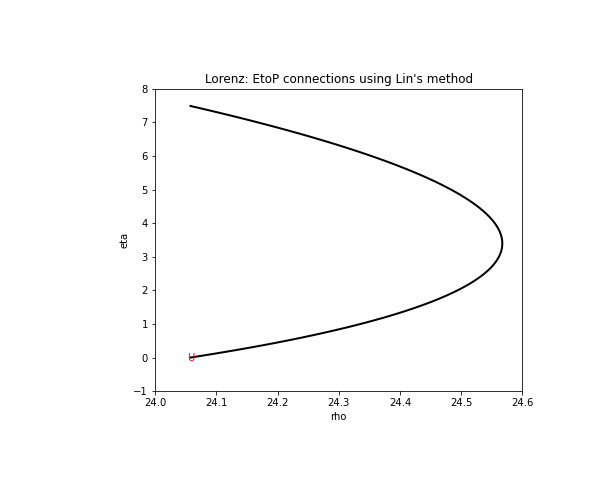

Created plot


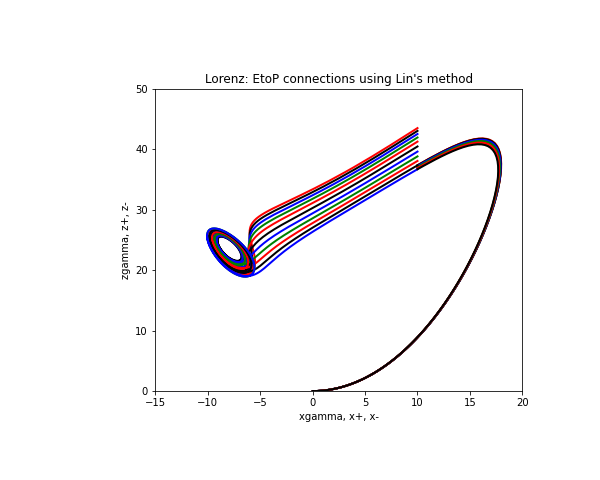

In [12]:
# rho vs gap size eta
p = ac.plot('closegap')
p.config(type='bifurcation')
p.config(grid=False)
p.config(bifurcation_x='rho', bifurcation_y='eta')
p.savefig('b.png')
display(Image.open('b.png'))

# orbit segments for closure of Lin gap, projected onto (x,z) plane
p = ac.plot('closegap')
p.config(grid=False)
p.config(label=list(range(12,23)))
p.savefig('b.png')
display(Image.open('b.png'))

Created plot


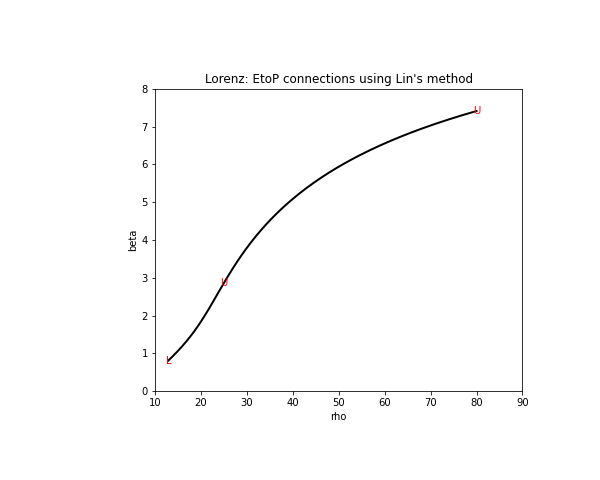

Created plot


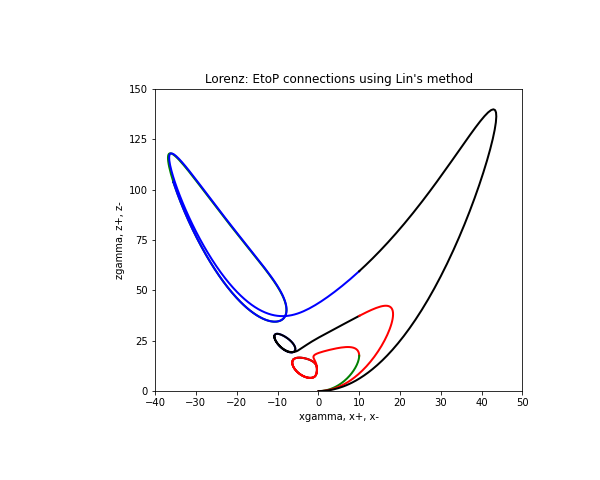

In [13]:
# beta vs rho
p = ac.plot('cont')
p.config(type='bifurcation')
p.config(grid=False)
p.config(bifurcation_x='rho', bifurcation_y='beta')
p.savefig('b.png')
display(Image.open('b.png'))

# corresponding orbits in phase space
p = ac.plot('cont')
p.config(grid=False)
p.config(label=list(range(23,26)))
p.savefig('b.png')
display(Image.open('b.png'))

In [15]:
# clean up files

ac.clean()
for suffix in ['closegap','cont','1','2','3','4','5','6','7','8']:
    ac.delete(suffix)

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.1 ... done
Deleting s.1 ... done
Deleting d.1 ... done
Deleting b.2 ... done
Deleting s.2 ... done
Deleting d.2 ... done
Deleting b.3 ... done
Deleting s.3 ... done
Deleting d.3 ... done
Deleting b.4 ... done
Deleting s.4 ... done
Deleting d.4 ... done
Deleting b.5 ... done
Deleting s.5 ... done
Deleting d.5 ... done
Deleting b.6 ... done
Deleting s.6 ... done
Deleting d.6 ... done
